In [41]:
import uproot
file = uproot.open("ZH_HCC_ZLL_NanoV9_2017_867C.root")
file.classnames()

{'tag;1': 'TObjString',
 'Events;1': 'TTree',
 'LuminosityBlocks;1': 'TTree',
 'Runs;1': 'TTree',
 'MetaData;1': 'TTree',
 'ParameterSets;1': 'TTree'}

In [42]:
tree = file["Events"]
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [43]:
branches = tree.arrays()
# print(len(branches))

Masking Muons

In [44]:
# double_muon_mask = branches["nMuon"] > 1
# print(double_muon_mask)
# print(branches["nMuon"][double_muon_mask])

# import numpy as np
# np.sum(branches["nMuon"][double_muon_mask])

pt_mask = branches["Muon_pt"] > 25
eta_mask = abs(branches["Muon_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
pt_eta_mask = pt_mask & eta_mask
print(pt_eta_mask)

# muon_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
# print(muon_mask)
# muon_mask = [x > 1 for x in muon_mask]
# print(muon_mask)
muon_mask = [len(sublist) > 1 for sublist in branches["Muon_mass"][pt_eta_mask]]
print(muon_mask)

[[True], [False], [], [], [False], ..., [True], [False], [False, False], []]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, Fals

Finding the 4-Vector of Muons

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][pt_eta_mask][muon_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][pt_eta_mask][muon_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][pt_eta_mask][muon_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][pt_eta_mask][muon_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][pt_eta_mask][muon_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][pt_eta_mask][muon_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][pt_eta_mask][muon_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][pt_eta_mask][muon_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

[90.38907467 90.35836731 91.17206302 ... 91.4895465  88.73809555
 90.28421218]


2381

Invariant Mass of Z boson

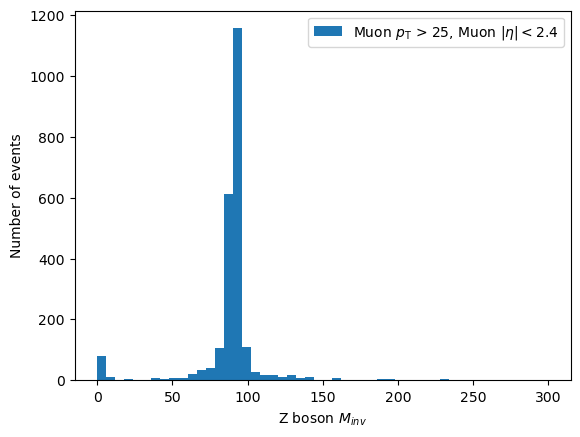

In [46]:
plt.hist(M.m, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (0, 300))
plt.xlabel("Z boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of Z boson

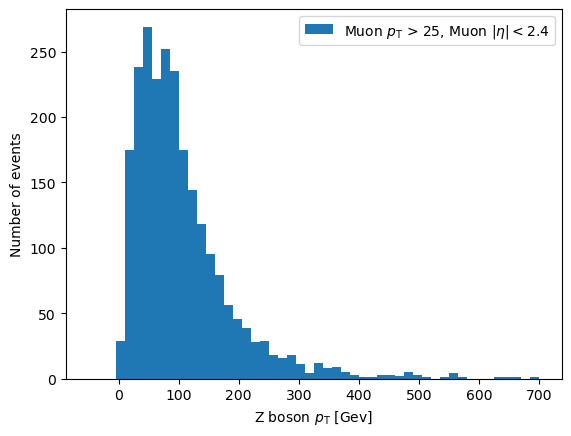

In [47]:
plt.hist(M.p_t, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (-50, 700))
plt.xlabel("Z boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()

pt, eta, phi of Jets

In [48]:
# pt = []
# eta = []
# phi = []

# for i in range(0, len(branches)):
#     # if i < 10:
#     #     print(i)
#     #     print("nMuon = ", branches["nMuon"][i], len(branches["Muon_pt"][i]))
#     #     print(branches["Jet_pt"][i])

#     # for j in range(0, branches["nMuon"][i]):
#     #     if i < 10:
#     #         print(branches["Muon_pt"][i][j])

#     for j in range(0, len(branches["Jet_pt"][i])):
#         # if i < 10:
#         pt.append(branches["Jet_pt"][i][j])

#     for k in range(0, len(branches["Jet_eta"][i])):
#         eta.append(branches["Jet_eta"][i][k])

#     for l in range(0, len(branches["Jet_phi"][i])):
#         phi.append(branches["Jet_phi"][i][l])

# plt.hist(pt, bins = 50, range = (0, 200))
# plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")
# plt.ylabel("Number of jets")
# plt.show()

# plt.hist(eta, bins = 100, range = (-5, 5))
# plt.xlabel("Jet $\eta$ [rad]")
# plt.ylabel("Number of jets")
# plt.show()

# plt.hist(phi, bins = 100, range = (-5, 5))
# plt.xlabel("Jet $\phi$ [rad]")
# plt.ylabel("Number of jets")
# plt.show()

Masking Jets

In [49]:
# double_jet_mask = branches["nJet"] > 1
# print(double_jet_mask)
# print(branches["nJet"][double_jet_mask])

pt_mask = branches["Jet_pt"] > 25
eta_mask = abs(branches["Jet_eta"]) < 2.4
jet_hadronflavour_mask = abs(branches["Jet_hadronFlavour"]) == 4
pt_eta_mask = pt_mask & eta_mask & jet_hadronflavour_mask
print(pt_eta_mask)

# jet_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
# print(jet_mask)
# jet_mask = [x > 1 for x in jet_mask]
jet_mask = [len(sublist) > 1 for sublist in branches["Jet_mass"][pt_eta_mask]]
print(jet_mask)

[[False, True, False, False, False, False, False], ..., [False, ..., False]]
[False, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, False, True, False, False, True, True, True, False, False, True, True, True, False, False, True, False, True, False, True, False, True, False, False, True, False, True, True, False, True, False, True, False, True, True, True, True, False, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, True, True, False, False, False, False, True, False, True, False, Tr

In [50]:
combined_mask = np.logical_and(jet_mask, muon_mask)

momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

for i in momentum:
    for j in range(0, 2):
        print(f"{i}{j + 1} = ", [sublist[j] for sublist in branches[i][pt_eta_mask][combined_mask]])

Jet_mass1 =  [29.5625, 11.625, 18.359375, 13.6640625, 7.9296875, 10.1796875, 24.953125, 10.8125, 13.4296875, 11.5, 9.2265625, 14.65625, 36.78125, 9.4609375, 11.1796875, 12.0234375, 23.703125, 15.6796875, 5.7070312, 25.96875, 12.125, 13.2578125, 16.5625, 10.6875, 15.6171875, 9.2421875, 10.484375, 11.5, 18.21875, 8.03125, 7.875, 15.0546875, 10.1796875, 13.6796875, 6.8007812, 18.046875, 37.625, 6.3671875, 14.8359375, 13.359375, 14.71875, 15.859375, 10.7578125, 6.734375, 18.234375, 9.578125, 6.9960938, 10.7109375, 14.0625, 7.8945312, 18.046875, 11.2890625, 15.3671875, 9.296875, 7.6992188, 7.7382812, 4.8867188, 7.2773438, 9.203125, 22.65625, 5.7851562, 8.171875, 9.671875, 19.140625, 12.5078125, 12.0703125, 4.875, 10.5546875, 9.7890625, 8.546875, 23.9375, 12.0234375, 4.1015625, 11.2734375, 23.03125, 10.140625, 22.984375, 13.6640625, 9.3046875, 12.546875, 16.9375, 6.640625, 14.65625, 13.4375, 17.8125, 12.484375, 4.9296875, 12.046875, 13.46875, 5.90625, 13.1484375, 6.9023438, 8.390625, 16.2343

Finding the 4-Vector of Jets

In [51]:
Jet1_mass = np.array([sublist[0] for sublist in branches["Jet_mass"][pt_eta_mask][combined_mask]])
Jet1_eta = np.array([sublist[0] for sublist in branches["Jet_eta"][pt_eta_mask][combined_mask]])
Jet1_phi = np.array([sublist[0] for sublist in branches["Jet_phi"][pt_eta_mask][combined_mask]])
Jet1_pt = np.array([sublist[0] for sublist in branches["Jet_pt"][pt_eta_mask][combined_mask]])

Jet2_mass = np.array([sublist[1] for sublist in branches["Jet_mass"][pt_eta_mask][combined_mask]])
Jet2_eta = np.array([sublist[1] for sublist in branches["Jet_eta"][pt_eta_mask][combined_mask]])
Jet2_phi = np.array([sublist[1] for sublist in branches["Jet_phi"][pt_eta_mask][combined_mask]])
Jet2_pt = np.array([sublist[1] for sublist in branches["Jet_pt"][pt_eta_mask][combined_mask]])

Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass, Jet1_eta, Jet1_phi, Jet1_pt)
Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass, Jet2_eta, Jet2_phi, Jet2_pt)

M = Jet1 + Jet2
print(M.m)
len(M.m)

[288.47455185  73.27688467 122.11110432 ...  82.12081985 108.25401798
 117.29644321]


1419

Invariant Mass of H boson

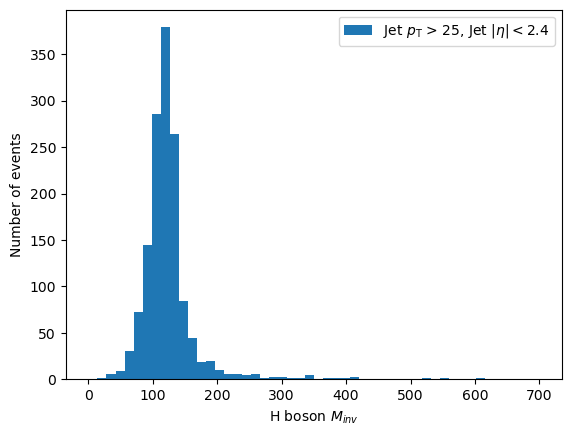

In [52]:
plt.hist(M.m, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 700))
plt.xlabel("H boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of H boson

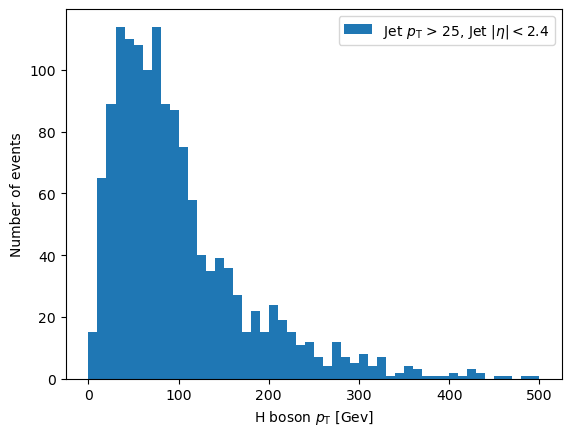

In [53]:
plt.hist(M.p_t, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 500))
plt.xlabel("H boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()

Kinematic Fit

Trial 1

In [54]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

parameters = torch.tensor([Muon1_pt[0], Muon2_pt[0], 
                           Jet1_pt[0], Jet2_pt[0], 
                           Muon1_phi[0], Muon2_phi[0],
                           Jet1_phi[0], Jet2_phi[0],
                           Muon1_eta[0], Muon2_eta[0]], dtype=torch.float64)

def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass - mass_z

    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

# Define the smearing values
smear_values = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# The covariance matrix initialization
n_params = 10
covariance_matrix = torch.zeros(n_params, n_params)
for i in range(n_params-1):
    covariance_matrix[i, i] = smear_values[i]**2

# Kinematic Fitter Initialization
fitter = KinematicFitter(n_constraints=3, n_parameters=10)
fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))

Trial 2

In [55]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

parameters = torch.tensor([Muon1_pt[0], Muon2_pt[0], 
                           Jet1_pt[0], Jet2_pt[0], 
                           Muon1_phi[0], Muon2_phi[0],
                           Jet1_phi[0], Jet2_phi[0],
                           Muon1_eta[0], Muon2_eta[0]], dtype=torch.float64)

# Calculate invariant mass
def invariant_mass(params: torch.Tensor) -> torch.Tensor:

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)   
   
    return invariant_mass

def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass(params) - mass_z

    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

# Define the smearing values
smear_values = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# The covariance matrix initialization
n_params = 10
covariance_matrix = torch.zeros(n_params, n_params)
for i in range(n_params-1):
    covariance_matrix[i, i] = smear_values[i]**2

# Kinematic Fitter Initialization
fitter = KinematicFitter(n_constraints=3, n_parameters=10)
fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))

Finding Invariant Mass of Jets with Fitted Parameters

In [152]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass - mass_z

    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

# Define the smearing values
smear_values = [0.05, 0.05, 0.15, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

# The covariance matrix initialization
n_params = 10
covariance_matrix = torch.zeros(n_params, n_params)
for i in range(n_params):
    covariance_matrix[i, i] = smear_values[i]**2

m_cc = []

# Maximum number of iterations for fitting
max_iterations = 10

for i in range(len((Jet1 + Jet2).m)):
    parameters = torch.tensor([Muon1_pt[i], Muon2_pt[i], 
                               Jet1_pt[i], Jet2_pt[i], 
                               Muon1_phi[i], Muon2_phi[i],
                               Jet1_phi[i], Jet2_phi[i],
                               Muon1_eta[i], Muon2_eta[i]], dtype=torch.float64)

    # Kinematic Fitter Initialization
    fitter = KinematicFitter(n_constraints=3, n_parameters=10, n_iterations=max_iterations)
    fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
    ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))
    
    fitted_params = torch.tensor(fitter.get_fitted_measured_params(), dtype=torch.float64)
    # print(fitted_params[3])
    fitted_Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass[i], Jet1_eta[i], fitted_params[6], fitted_params[2])
    fitted_Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass[i], Jet2_eta[i], fitted_params[7], fitted_params[3])

    M = fitted_Jet1 + fitted_Jet2
    m_cc.append(M.m)

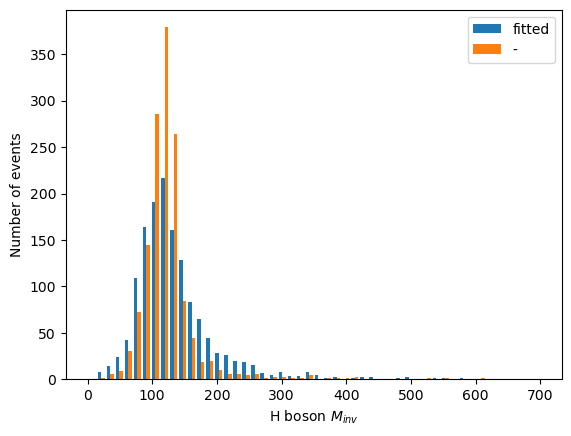

In [153]:
plt.hist([m_cc, (Jet1 + Jet2).m], label = ["fitted", "-"], bins = 50, range = (0, 700))
plt.xlabel("H boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()